In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.signal import butter, lfilter

In [71]:
#Read data from CSV datafile
dataset = pd.read_excel("data.xlsx", usecols=[15,16]) 
array_data = np.array(dataset);
array_data = array_data[:30000]

In [72]:
#x is time, y is RED
x = np.array([i*0.02 for i in range(0,30000)]);
y = array_data[:,1];

In [73]:
#Functions for Butterworth filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [74]:
#Filter RED data for Heart Rate (0.5-2 Hz)
y_HR = butter_bandpass_filter(y[:], 0.3, 1.4,50, order=5)

In [75]:
from scipy.signal import argrelmax, argrelextrema

#Finding the index of peaks for heart rate
peakindex_HR = argrelextrema(y_HR, np.greater)

#Storing the peaks and corresponding times for Heart rate
peaks_HR = [y_HR[i] for i in peakindex_HR]
time_HR = [x[i] for i in peakindex_HR]

In [76]:
#Calculating denominators for Heart Rate formula - distance between two peaks
HR_diff = [peakindex_HR[0][i+1] - peakindex_HR[0][i] for i in range(len(peakindex_HR[0])-1)]
#print HR_diff

#Calculating heart rate
HR_array = []
for i in HR_diff:
    HR_array.append(3000.0/i);    #Instantaneous Heart rate

#Heart rate
print "Average Heart Rate: ", np.around(np.mean(HR_array[2:]),4)

HR_range = [elem for elem in np.array(HR_array) if elem > 55 and elem<100]
print "Instantaneous Heart Rate"
#print '\n'.join('{}'.format(item,4) for item in HR_range)
print "Percentage of data considered: ",100*float(len(HR_range))/len(HR_array)
print "Average of range considered: ",np.mean(HR_range)

Average Heart Rate:  73.6813
Instantaneous Heart Rate
63.829787234
88.2352941176
73.1707317073
78.9473684211
85.7142857143
75.0
71.4285714286
58.8235294118
88.2352941176
90.9090909091
83.3333333333
60.0
57.6923076923
63.829787234
85.7142857143
83.3333333333
69.7674418605
71.4285714286
83.3333333333
90.9090909091
61.2244897959
68.1818181818
69.7674418605
71.4285714286
68.1818181818
60.0
75.0
83.3333333333
96.7741935484
65.2173913043
78.9473684211
60.0
58.8235294118
78.9473684211
76.9230769231
69.7674418605
56.6037735849
69.7674418605
85.7142857143
76.9230769231
81.0810810811
81.0810810811
88.2352941176
90.9090909091
85.7142857143
55.5555555556
85.7142857143
88.2352941176
66.6666666667
85.7142857143
75.0
63.829787234
88.2352941176
63.829787234
88.2352941176
57.6923076923
83.3333333333
62.5
57.6923076923
68.1818181818
61.2244897959
63.829787234
96.7741935484
56.6037735849
58.8235294118
55.5555555556
66.6666666667
73.1707317073
83.3333333333
81.0810810811
90.9090909091
76.9230769231
83.333

In [77]:
#Filtering for Respiration rate
y_R = butter_bandpass_filter(y[:], 0.2, 0.5, 50, order=5)

#Finding index of peaks for Respiration rate
peakindex_R = argrelextrema(y_R, np.greater)

#Finding peaks and corresponding times for Respiration rate
peaks_R = [y_R[i] for i in peakindex_R]
time_R = [x[i] for i in peakindex_R]

In [78]:
#print time_R

#Finding respiration rate
R_array = []
R_diff = [time_R[0][i+1] - time_R[0][i] for i in range(len(time_R[0])-1)]
for i in R_diff:
    R_array.append(60/i)    #Instantaneous

print "Instantaneous Respiration Rate: "   
#print '\n'.join('{}'.format(item,4) for item in R_array[1:])
#Average
print "Average respiration rate: ", np.around(np.mean(R_array[1:]),4)

Instantaneous Respiration Rate: 
16.8539325843
17.6470588235
17.0454545455
17.2413793103
17.3410404624
17.2413793103
17.1428571429
17.2413793103
17.2413793103
17.1428571429
17.0454545455
17.2413793103
16.8539325843
17.7514792899
17.0454545455
17.0454545455
16.9491525424
16.9491525424
17.1428571429
17.1428571429
16.4835164835
17.2413793103
17.1428571429
17.5438596491
17.3410404624
17.2413793103
17.1428571429
17.2413793103
17.3410404624
17.1428571429
17.1428571429
17.2413793103
17.4418604651
17.2413793103
17.2413793103
17.0454545455
17.2413793103
17.4418604651
17.1428571429
17.2413793103
17.1428571429
17.0454545455
17.1428571429
17.3410404624
17.1428571429
17.1428571429
17.2413793103
17.2413793103
17.4418604651
17.0454545455
17.1428571429
16.9491525424
17.2413793103
17.4418604651
17.1428571429
17.2413793103
17.4418604651
17.1428571429
16.9491525424
17.2413793103
17.1428571429
17.3410404624
17.6470588235
17.3410404624
17.1428571429
17.0454545455
17.4418604651
17.2413793103
17.2413793103
1

In [79]:
#SPO2 calculation

#Already calculated max peaks for RED (peaks_HR, time_HR)
#Applying filter
upper = 1.6
order = 2
y_RED = butter_bandpass_filter(y[:], 0.001, upper, 50, order)

#Finding index of peaks for RED
peakindex_RED = argrelextrema(y_RED, np.greater)

#Calculating peaks and corresponding times for RED
peaks_RED = [y_RED[i] for i in peakindex_RED]
time_RED = [x[i] for i in peakindex_RED]

#Finding min peaks index for RED
peakindex_RED_min = argrelextrema(y_RED, np.less)
peaks_RED_min = [y_RED[i] for i in peakindex_RED_min]
time_RED_min = [x[i] for i in peakindex_RED_min]

In [80]:
#Interpolating min peaks for RED to find DC at time_HR
DC_RED = np.interp(time_RED[0], time_RED_min[0], peaks_RED_min[0])

#Calculating AC for RED values
AC_RED = peaks_RED[0] - DC_RED

In [81]:
#z is IR values
z = array_data[:,0];

#Applying filter
z_IR = butter_bandpass_filter(z[:], 0.001, upper, 50, order)

#Finding index of peaks for IR
peakindex_IR = argrelextrema(z_IR, np.greater)

#Calculating peaks and corresponding times for IR
peaks_IR = [z_IR[i] for i in peakindex_IR]
time_IR = [x[i] for i in peakindex_IR]

#Finding index of min peaks for IR
peakindex_IR_min = argrelextrema(z_IR, np.less)

#Finding peaks and corresponding times for min IR peaks
peaks_IR_min = [z_IR[i] for i in peakindex_IR_min]
time_IR_min = [x[i] for i in peakindex_IR_min]

In [82]:
#Interpolating min peaks for RED to find DC at time_IR
DC_IR = np.interp(time_IR[0], time_IR_min[0], peaks_IR_min[0])

#Calculating AC for IR values
AC_IR = peaks_IR[0] - DC_IR

In [83]:
#Calculating ratio average
#Finding if RED/ IR has lesser number of peaks
length = 0
if len(AC_RED) < len(DC_IR):
    length = len(AC_RED)
else:
    length = len(DC_IR)
        
num = AC_RED[0:length]*DC_IR[0:length]
den = AC_IR[0:length]*DC_RED[0:length]

ratio_avg = num/den
#ratio_avg = den/num

In [84]:
spo2 = -45.060*ratio_avg*ratio_avg+30.354*ratio_avg+94.845

spo2_range = [elem for elem in np.array(spo2) if elem > 90 and elem < 100]
print "Instantaneous SPO2: "
#print '\n'.join('{}'.format(item,4) for item in spo2_range)
print "Percentage of data considered: ",100*float(len(spo2_range))/len(spo2)
print "Average of SPO2 considered: ",np.mean(spo2_range)

Instantaneous SPO2: 
95.0772514687
99.7336028171
98.0755172838
99.9158635192
96.803513921
97.0513727091
97.2404340748
99.9107912543
99.9365647775
97.1426711322
98.1830095985
95.1815787675
99.8611148552
92.9576199039
99.526878459
97.8123126155
98.0283504709
96.270494111
99.1311059281
98.6199174958
99.6031962088
96.9750023185
99.8313857848
99.835178569
98.0637828582
99.313187092
97.3091053905
98.7217672439
99.8940681796
97.0322797281
99.2672664588
99.9445077377
99.7482816879
99.0928249371
95.3245803205
94.9432660953
99.1519257247
97.9872121514
99.9368003152
96.9248142408
93.2089247733
99.941721286
99.7839826818
94.9616874567
95.1427718886
96.9945925255
96.5501221723
92.9077080213
97.9856331912
97.5018892291
98.5201104884
98.4648730473
99.9496323506
99.8761333273
99.1445506653
99.9461939232
95.5752637832
97.2940781103
91.4707852493
92.7494871957
99.6434381663
91.047869065
92.1414089095
95.7866346125
96.625195079
99.9425986727
96.9412949495
94.911151513
97.5292752473
99.6082557469
99.95568

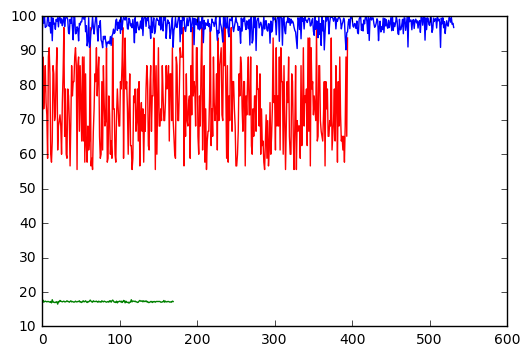

In [85]:
x_range = [i for i in range(len(HR_range))]
plt.plot(x_range, HR_range, 'r')

x_range = [i for i in range(len(R_array)-1)]
plt.plot(x_range, R_array[1:], 'g')

x_range = [i for i in range(len(spo2_range))]
plt.plot(x_range, spo2_range, 'b')

plt.show()